array([[[120, 121, 149],
        [120, 121, 149],
        [121, 119, 148],
        ...,
        [100,  90, 102],
        [102,  92, 104],
        [101,  91, 103]],

       [[120, 121, 149],
        [120, 121, 149],
        [121, 119, 148],
        ...,
        [100,  90, 102],
        [102,  92, 104],
        [101,  91, 103]],

       [[118, 117, 143],
        [117, 116, 142],
        [121, 117, 146],
        ...,
        [101,  92, 102],
        [100,  90, 102],
        [101,  91, 103]],

       ...,

       [[115, 116, 144],
        [117, 117, 141],
        [119, 117, 137],
        ...,
        [102,  93, 103],
        [101,  90, 100],
        [102,  91, 101]],

       [[113, 110, 132],
        [114, 112, 132],
        [116, 110, 127],
        ...,
        [102,  94, 105],
        [103,  93, 105],
        [105,  95, 107]],

       [[109, 105, 124],
        [109, 106, 122],
        [111, 103, 120],
        ...,
        [103,  95, 106],
        [104,  94, 106],
        [105,  95, 107]]

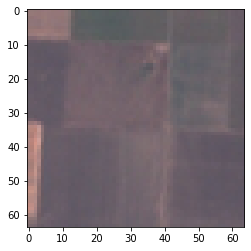

In [1]:
from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


img = image.load_img("testImages/AnnualCrop_1.jpg")
plt.imshow(img)


cv2.imread("testImages/AnnualCrop_1.jpg")


In [2]:

train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

validation_generator = validation.flow_from_directory('validation', target_size=(
    200, 200))

train_dataset = train.flow_from_directory('trainImages', target_size=(
    200, 200), color_mode="rgb", batch_size=100, class_mode='categorical')

train_dataset.class_indices


Found 0 images belonging to 0 classes.
Found 675 images belonging to 3 classes.


{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2}

In [3]:



train_dataset.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='sigmoid'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')])



In [5]:

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=['accuracy'] )     




In [ ]:

model_fit = model.fit(train_dataset,
            steps_per_epoch = 6 ,
            epochs = 10,
            validation_data = validation_generator,
            validation_steps = 8
            )

print(model_fit)           



Epoch 1/10
6/6 [==============================] - 15s 2s/step - loss: 2.6734 - accuracy: 0.5507
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 0.8660 - accuracy: 0.4928
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 0.8127 - accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 15s 3s/step - loss: 0.8068 - accuracy: 0.5072
Epoch 5/10
1/6 [====>.........................] - ETA: 11s - loss: 0.8532 - accuracy: 0.6667

In [ ]:
dir_path = 'testImages'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size=(200,200,3)  )
    plt.imshow(img)
    plt.show()


    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    # if val == 0:
    #     print('AnnualCrop')
    # elif val == 1:
    #     print("Forest")
    # elif val == 2:
    #     print("HerbaceousVegetation")
    # elif val == 3:
    #     print("Highway")
    # elif val == 4:
    #     print("Industrial")
    # elif val == 5:
    #     print("Pasture")
    # elif val == 6:
    #     print("PermanentCrop")
    # elif val == 7:
    #     print("Residential")  
    # elif val == 8:
    #     print("River")
    # else:
    #     print("SeaLake")                              


